<a href="https://colab.research.google.com/github/IsaacHgo/Clasificador-de-Gatos-o-Flores/blob/main/Te_pareces_mas_a_una_Flor_o_un_Gato_(Clasificador).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¿Te pareces más a un gato o una flor?

*Isaac Hidago P*

# Introducción

Se quiere comprobar las capacidades de las redes neuronales para poder reconocer patrones de manera sencilla y poder clasificar dos categorias aparentemente diferentes de forma automatica usando imagenes.
Esto es principalmente para un juego en el cual podremos ver si una respectiva foto o imagen tiene más parentezco con una flor o con un gato. Un juego simple que nos ayudara ver implemnetaciónes de las redes neuronales.
Además se quiere ver el impacto generado de un filtro de imagenes que, personalmente, me pareció curioso en internet.
Para hacer esto tenemos que pasar por todas las partes que implican generar un modelo de clasificación con imagenes y RNR por lo que tendremos que empezar con lo más escencial

In [1]:
#Librerias
import os
import kagglehub
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import gradio as gr

# Base de datos
Se ha elegido una base de datos en libre acceso de Kaggle. Esta contiene multiples imagenes de personas, bicicletas, flores, gatos, etc.

Para los objetivos del problema de clasificación y debido a la curiosidad personal se ha elegido unicamnete dos categorias; gatos y flores por lo que se extraerá la base de datos y en base a la ruta prevista donde se descargaran las imagenes.


In [21]:
# Primero cargamos una base de dtaos de Kaggle
#Tiene bastantes imagenes de algnas cosas como bicicletas, personas y asi
#Pero lo que nos importa es que haremos un clasificador de gatos y flores

path = kagglehub.dataset_download("pavansanagapati/images-dataset")
print("Path to dataset files:", path)

# Listamos las subcarpetas para extraer solo las imagenes que necesitamos
for root, dirs, files in os.walk(path):
    print(f"Found directory: {root}")

Using Colab cache for faster access to the 'images-dataset' dataset.
Path to dataset files: /kaggle/input/images-dataset
Found directory: /kaggle/input/images-dataset
Found directory: /kaggle/input/images-dataset/data
Found directory: /kaggle/input/images-dataset/data/horses
Found directory: /kaggle/input/images-dataset/data/cars
Found directory: /kaggle/input/images-dataset/data/dogs
Found directory: /kaggle/input/images-dataset/data/flowers
Found directory: /kaggle/input/images-dataset/data/data
Found directory: /kaggle/input/images-dataset/data/data/horses
Found directory: /kaggle/input/images-dataset/data/data/cars
Found directory: /kaggle/input/images-dataset/data/data/dogs
Found directory: /kaggle/input/images-dataset/data/data/flowers
Found directory: /kaggle/input/images-dataset/data/data/bike
Found directory: /kaggle/input/images-dataset/data/data/cats
Found directory: /kaggle/input/images-dataset/data/data/human
Found directory: /kaggle/input/images-dataset/data/bike
Found di

###Ejemplos de imagens

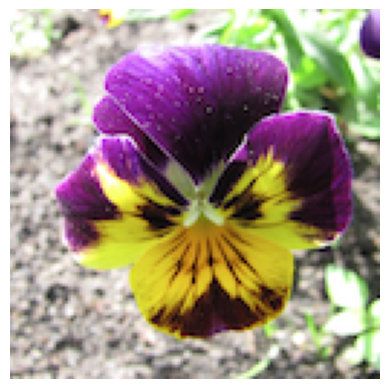

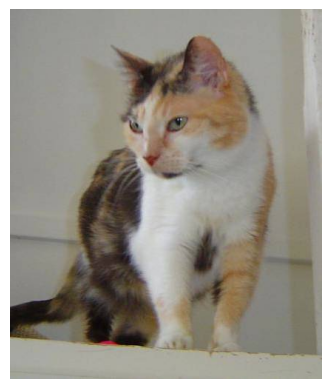

In [186]:
flower1="/root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/flowers"
Catos1="/root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/cats"
#Esto solo es un ejemplo
path = flower1#nombre de la pic
# Cargar y mostrar una imagen de ejemplo
image_path = os.path.join(path, "0130.png")#mejor se busco directamente donde está
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()
path = Catos1
# Cargar y mostrar una imagen de ejemplo
image_path = os.path.join(path, "cat.130.jpg")
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

### Preparación de la base de datos:
Se eligen únicamente las imagenes de gatos y flores y se les aplican diferentes filtros para usarlas en el modelo.
#### Transformación de las imagenes:
Se hacen diferentes filros como son un cambio de estaca, una normalización de los pixeles y sobre todo el filro *UnsharpMask* que nos ayuda en teoria para reconocer bordes de patrones mas concretos, vease el ejemplo siguiente:
#### Sin filtro:
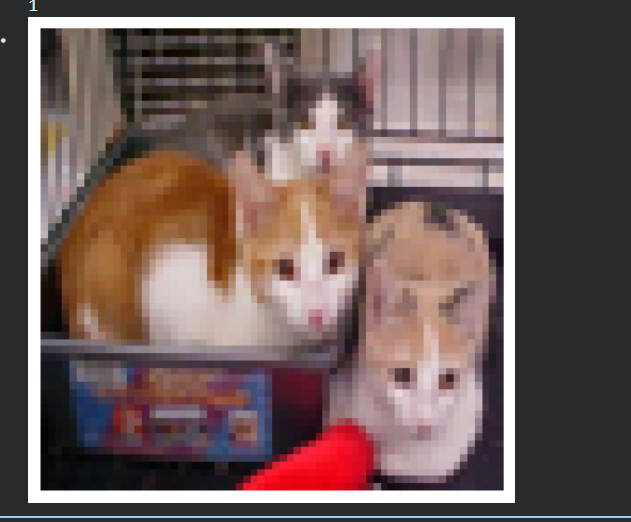

#### Con filtro:
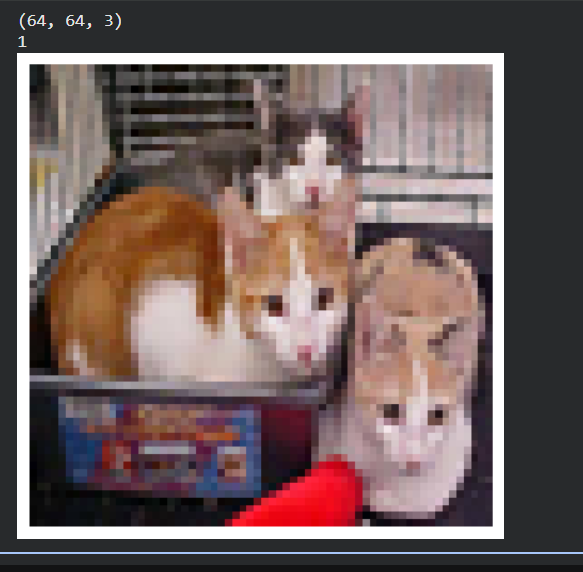.

Además, se obtiene el array de la imagen para obtener sus datos de forma más
concreta

In [193]:
from PIL import ImageFilter

def filtro_patrones(img):
    return img.filter(ImageFilter.UnsharpMask(radius=2, percent=180))
    #He ocupado este filtro para mejorar la vizualizacion de bordes en
    #las imagenes

# Rutas de las carpetas (cambia estas rutas por las tuyas)
W_gatos = Catos1
W_flores = flower1
# Función para cargar y preprocesar las imágenes
#El tamañ es mediano para que no sea poca información
Tamano=(64, 64)
def cargar_imagenes(ruta, Clase, Tamano):
    imagenes = []
    GyF = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".jpg") or archivo.endswith(".png"):  # Considera solo archivos de imagen
            #A partir de aqui, la imagen será deformada a nuestro placer como si fueramos los Qu (All Tomorrows)
            imgage = Image.open(os.path.join(ruta, archivo))
            imgage = imgage.convert("RGB")
            imgage = filtro_patrones(imgage)
            #imgage = imgage.convert('L') # Convertir a escala de grises para que mi pc no se queme y se cargen los archivos bien
            #Este filtro fue eliminado ya que se observo que a una escala de colores mi pc no se quema, ademas se obtienen mejores resultados
            imgage = imgage.resize(Tamano)# Redimensionar la imagen a lo definido
            imgageArai = np.array(imgage) # Convertir la imagen a un array
            imgageArai = imgageArai / 255.0 ## Normalizcion de los pixeles
            imagenes.append(imgageArai) # Añadir la imagen y la clasificacion al conjunto de datos
            GyF.append(Clase) #Preferí no usar filtros grandes debido a que la matriz de confusion se iba a la v
    return np.array(imagenes), np.array(GyF)

# Cargar imágenes. 1 es para gatos y 2 para flores
imagenes_gatos, GyF_gatos = cargar_imagenes(W_gatos, Clase=1,
                                            Tamano=Tamano)
imagenes_flores, GyF_flores = cargar_imagenes(W_flores, Clase=0,
                                              Tamano=Tamano)
# Unir alos datos
imagenes = np.concatenate([imagenes_gatos, imagenes_flores], axis=0)
GyF = np.concatenate([GyF_gatos, GyF_flores], axis=0)


### Ejemplo con filtro:

(64, 64, 3)
0


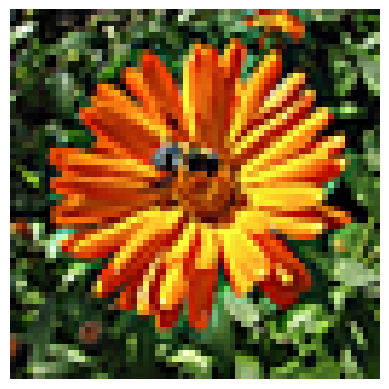

In [195]:
indices = np.arange(len(imagenes))   # [0, 1, 2, ..., N]
np.random.shuffle(indices)           # Mezcla los índices

imagenes = imagenes[indices]         # Aplica la mezcla a las imágenes
GyF = GyF[indices]


r=random.randint(0, len(imagenes))
plt.imshow(imagenes[r])
plt.axis('off')
print(imagenes[r].shape)
print(GyF[r])
plt.show()

## Generación de data
Ahora, debido a que no tenemos una base de datos gigantes vamos a usar un truco conocido. Se hacen diferentes filtros o modificaciones drásticas a las imagenes para crear más información para la base de datos

#### Partición de datos
Muy aparte de lo anterior se dividen los conjuntos de entrenamiento y prueba para las metricas de evaluación de los modelos y el filtro elegido

In [196]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Aqui vamos más allá de los Qu y jugamos a ser dioses con las imagenes
datagen = ImageDataGenerator(
    rotation_range=40,      #Rotación aleatoria
    width_shift_range=random.uniform(0.01, 0.3),  #Desplazamiento horizontal aleatorio
    height_shift_range=random.uniform(0.01, 0.3), #Desplazamiento vertical aleatorio
    shear_range=random.uniform(0.01, 0.3),        #Corte aleatorio
    horizontal_flip=True,   #Volteo aleatorio
    fill_mode='nearest'     #Rellenar lo vacio tras la deformación
    #Sobre esto estuve pensandi mucho y vi los diferentes tipos de llenado, al final me decidi de este para no complicar con datos inecesarios el modelo
)

# Repetir las imágenes para aumentar el tamaño del dataset
Images_New = []
GyF_New = []

# Aplicar aumentación a las imágenes originales
for i in range(len(imagenes)):
    img = imagenes[i]
    Clase = GyF[i]
    # Redimensionar para usar ImageDataGenerator
    img = np.expand_dims(img, axis=0)
    # Generar las iagenes buenas.
    for _ in range(5):  # Crear 5 versiones aumentadas por imagen original
        for img_aumentada in datagen.flow(img, batch_size=1):
            Images_New.append(img_aumentada[0])
            GyF_New.append(Clase)
            break

#Esto ya se ha hecho
# Convertir arrays
Images_New = np.array(Images_New)
GyF_New = np.array(GyF_New)
# Unir las imágenes nuevas con las otras
imagenes = np.concatenate([imagenes, Images_New], axis=0)
GyF = np.concatenate([GyF, GyF_New], axis=0)
# Revolver los datos de nuevo. jsjjss Terremoto xd
indices = np.arange(imagenes.shape[0])
np.random.shuffle(indices)
# De ví que barajear cartas 7 veces hace ya una baraja aleatoria
np.random.shuffle(indices)
np.random.shuffle(indices)
# jajajaja aunque pensandolo bien con la funicíon random funciona
#Se elimina 4 barajeos

#Ordenar
imagenes = imagenes[indices]
GyF = GyF[indices]

# Dividir en conjunto de entrenamiento y prueba
imagenes_train, imagenes_test, GyF_train, GyF_test = train_test_split(
    imagenes, GyF, test_size=0.2, random_state=42)

# Verifica las dimensiones
print(imagenes_train.shape, GyF_train.shape)
print(imagenes_test.shape, GyF_test.shape)

(1977, 64, 64, 3) (1977,)
(495, 64, 64, 3) (495,)


### Pequeño ejemplo de las imagenes incluyendo la data creada

(64, 64, 3)
1


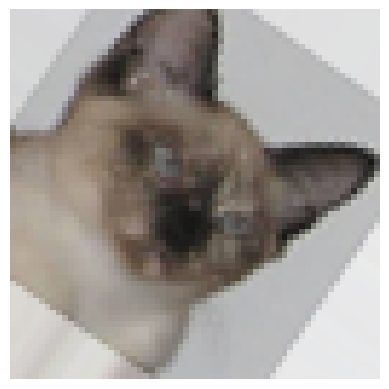

In [239]:
r=random.randint(0, 1977)
plt.imshow(imagenes[r],)
plt.axis('off')  # Opcional: ocultar los ejes
print(imagenes[r].shape)
print(GyF[r])
plt.show()

#  Analisis del modelo de redes neuronales

Se crea un modelo sencillo con un optimizador basico *adam*. Esto con el fin de clasificar nuestro modelo. De hecho se hace de pocas capas para hacerlo lo mas parsimonioso posible.



### Resumen de las capas modelo:

1. **Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3))**  
   Aplica filtros para extraer características locales de la imagen RGB.

2. **MaxPooling2D((2,2))**  
   Reduce a la mitad la resolución para simplificar y destacar características importantes.

3. **Conv2D(64, (3,3), activation='relu')**  
   Aplica otros filtros.

4. **MaxPooling2D((2,2))**  
   Reduce nuevamente la resolución.

5. **Flatten()**  
   Aplana la salida 2D en un vector 1D para tener una única métrica de medición sencilla.

6. **Dense(128, activation='relu')**  
   Capa de 128 neuronas para su entrenamiento.

7. **Dense(2, activation='softmax')**  
   Capa final con 2 neuronas que genera probabilidades para cada clase.

  
### Resumen del resumen:

| Input Shape    | Descripción           | Salida / Forma                      |
| -------------- | --------------------- | ----------------------------------- |
| Imagen RGB     | Imagen de entrada     | (64, 64, 3)                         |
| Conv2D         | 64 filtros 3x3        | (62, 62, 64)                        |
| ReLU           | Función de activación |                                     |
| MaxPooling2D   | Tamaño (2, 2)         | (31, 31, 64)                        |
| Conv2D         | 64 filtros 3x3        | (29, 29, 64)                        |
| ReLU           | Función de activación |                                     |
| MaxPooling2D   | Tamaño (2, 2)         | (14, 14, 64)                        |
| Flatten        | Aplanamiento          | 14 * 14 * 64 = 12,544 neuronas      |
| Dense          | Fully Connected       | 128 neuronas                        |
| ReLU           | Función de activación |                                     |
| Dense (Salida) | Salida softmax        | 2 neuronas (Prob. Gato, Prob. Flor) |
| Clasificación  | Resultado final       | Gato o Flor                         |



<span style="font-size:4px;">(Decidí poner relu como renglon aparte por esética del codigo texto)</span>

# Modelo y entrenamiento
Debido a las capacidades de procesamiento de mi computadora se ha elegido por solo usar un 30% de la base de datos total para las pruebas de eras.
Esto puede representar un problema de sesgo, pero es lo más optimo hecho

In [180]:
train_sample_size = int(0.3 * len(imagenes_train))
test_sample_size = int(0.3 * len(imagenes_test))
indices_train = np.random.choice(len(imagenes_train), train_sample_size, replace=False)
indices_test = np.random.choice(len(imagenes_test), test_sample_size, replace=False)
imagenes_train = imagenes_train[indices_train]
GyF_train = GyF_train[indices_train]
imagenes_test = imagenes_test[indices_test]
GyF_test = GyF_test[indices_test]
print(imagenes_train.shape, GyF_train.shape)
print(imagenes_test.shape, GyF_test.shape)

(593, 64, 64, 3) (593,)
(148, 64, 64, 3) (148,)


## Elección de épocas.

Una época se considera de manera resumida cada vez que se pasan los datos tenidos a la red neuronal y se evalua. como esta no es perfecta ajusta sus pesos con cada epoca extra para tener una aproximación más certera de la calsificación.

Visto lo anterior del curso. Tampoco se trata de hacer un sobre ajuste del modelo ni un procesamiento absurdo de datos. por lo que se hacen simulaciones con las métricas *Accuracy* y *Loss error* para evaluar que tanto mejora el modelo con cada epoca hecha. así elegir un número optimo para mi computadora y el *Accuracy*

Debido al mismo problema de datos, no es posible para la computadora hacer cientos de simulaciones así que solo se ha entrenado el modelo de forma idenpendiente 20 veces, cada una de ellas con 20 épocas y, como antes fue mencionado, solo con un 30% de la base de datos aumnetada.

### Simulaciones de entrenamiento y recopilación de resultados

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

n_replicas = 20
epochs = 20
histories = []
for i in range(n_replicas):
    print(f"\n=== Entrenamiento {i+1}/{n_replicas} ===")
    modelo = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

    modelo.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    history = modelo.fit(
        imagenes_train, GyF_train,
        epochs=epochs,
        validation_data=(imagenes_test, GyF_test),
        verbose=0)

    histories.append(history)

# Inicializar arrays
loss_array = np.zeros((epochs,))
val_loss_array = np.zeros((epochs,))
acc_array = np.zeros((epochs,))
val_acc_array = np.zeros((epochs,))
#Sumarlos
for h in histories:
    loss_array += np.array(h.history['loss'])
    val_loss_array += np.array(h.history['val_loss'])
    acc_array += np.array(h.history['accuracy'])
    val_acc_array += np.array(h.history['val_accuracy'])
#Dividirlos para promediar
loss_avg = loss_array / n_replicas
val_loss_avg = val_loss_array / n_replicas
acc_avg = acc_array / n_replicas
val_acc_avg = val_acc_array / n_replicas
plt.figure(figsize=(12,5))



=== Entrenamiento 1/20 ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



=== Entrenamiento 2/20 ===

=== Entrenamiento 3/20 ===

=== Entrenamiento 4/20 ===

=== Entrenamiento 5/20 ===

=== Entrenamiento 6/20 ===

=== Entrenamiento 7/20 ===

=== Entrenamiento 8/20 ===

=== Entrenamiento 9/20 ===

=== Entrenamiento 10/20 ===

=== Entrenamiento 11/20 ===

=== Entrenamiento 12/20 ===

=== Entrenamiento 13/20 ===

=== Entrenamiento 14/20 ===

=== Entrenamiento 15/20 ===

=== Entrenamiento 16/20 ===

=== Entrenamiento 17/20 ===

=== Entrenamiento 18/20 ===

=== Entrenamiento 19/20 ===

=== Entrenamiento 20/20 ===


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

## Resultados de la simaulción

*Época donde loss se estabiliza: 6*

*Época donde val_loss se estabiliza: 5*

*Época donde acc se estabiliza: 5*

*Época donde val_acc se estabiliza: 3*

Gracias a esto podemos promediar 5 Épocas para tener un resultado aceptable


Época donde loss se estabiliza: 6
Época donde val_loss se estabiliza: 5
Época donde acc se estabiliza: 5
Época donde val_acc se estabiliza: 3


<Figure size 1200x500 with 0 Axes>

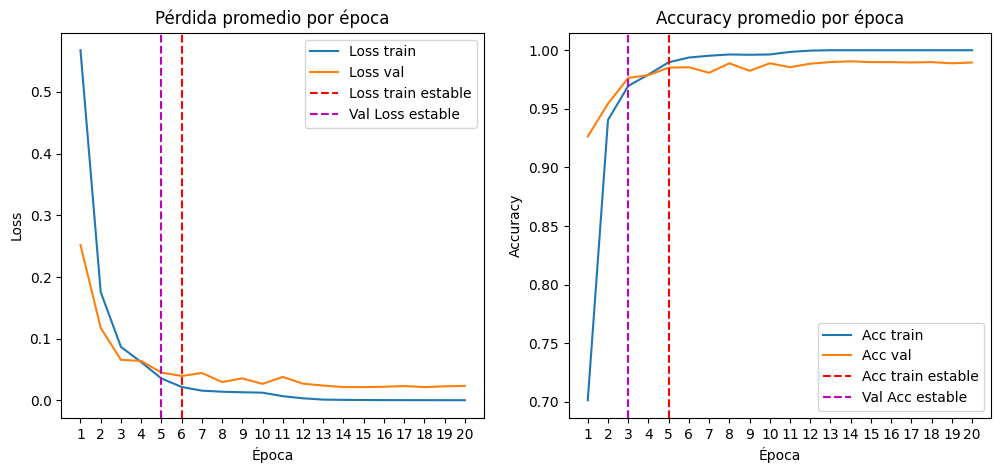

In [220]:
#Funición de parada
def encontrar_epoca_estable(metrica, umbral=0.01, min_epocas=3):
    for i in range(len(metrica) - min_epocas + 1):
        diffs = np.abs(np.diff(metrica[i:i+min_epocas]))
        if np.all(diffs < umbral):
            return i + 1 #Es pq inicia en 0 y python
    return len(metrica)  #si ya no hay estabilizacion devolver el ultimo valor


epoca_loss = encontrar_epoca_estable(loss_avg)
epoca_val_loss = encontrar_epoca_estable(val_loss_avg)
epoca_acc = encontrar_epoca_estable(acc_avg)
epoca_val_acc = encontrar_epoca_estable(val_acc_avg)

print("Época donde loss se estabiliza:", epoca_loss)
print("Época donde val_loss se estabiliza:", epoca_val_loss)
print("Época donde acc se estabiliza:", epoca_acc)
print("Época donde val_acc se estabiliza:", epoca_val_acc)

plt.figure(figsize=(12,5))

plt.figure(figsize=(12,5))

# Pérdida
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), loss_avg, label='Loss train')
plt.plot(range(1, epochs+1), val_loss_avg, label='Loss val')
plt.axvline(epoca_loss, color='r', linestyle='--', label='Loss train estable')
plt.axvline(epoca_val_loss, color='m', linestyle='--', label='Val Loss estable')
plt.title("Pérdida promedio por época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.xticks(range(1, epochs+1, 1))

# Accuracy
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), acc_avg, label='Acc train')
plt.plot(range(1, epochs+1), val_acc_avg, label='Acc val')
plt.axvline(epoca_acc, color='r', linestyle='--', label='Acc train estable')
plt.axvline(epoca_val_acc, color='m', linestyle='--', label='Val Acc estable')
plt.title("Accuracy promedio por época")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(range(1, epochs+1, 1))

plt.show()

# Modelo
Se selecciona el 100% de la base de datos

Se pone en trabajo el entrenamiento de la red neuronal y se evalua finalmente.

*Además se agrega un metodo interactivo de evaluación* (el juego)

In [227]:
train_sample_size = int(1 * len(imagenes_train))
test_sample_size = int(1 * len(imagenes_test))
indices_train = np.random.choice(len(imagenes_train), train_sample_size, replace=False)
indices_test = np.random.choice(len(imagenes_test), test_sample_size, replace=False)
imagenes_train = imagenes_train[indices_train]
GyF_train = GyF_train[indices_train]
imagenes_test = imagenes_test[indices_test]
GyF_test = GyF_test[indices_test]
print(imagenes_train.shape, GyF_train.shape)
print(imagenes_test.shape, GyF_test.shape)

(1977, 64, 64, 3) (1977,)
(495, 64, 64, 3) (495,)


In [228]:
# Crear un modelo simple de clasificación
modelo = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

# Compilar el modelo
modelo.compile(optimizer='AdamW', #Este optimizador es el que mejor me ha resultado y pq no quiero un sobre ajuste
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo con las épocas dichas
modelo.fit(imagenes_train, GyF_train, epochs=5, validation_data=(imagenes_test, GyF_test))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - accuracy: 0.7539 - loss: 0.5276 - val_accuracy: 0.9939 - val_loss: 0.0436
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9630 - loss: 0.1149 - val_accuracy: 0.9939 - val_loss: 0.0254
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.9965 - loss: 0.0255 - val_accuracy: 0.9859 - val_loss: 0.0280
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 259ms/step - accuracy: 0.9985 - loss: 0.0192 - val_accuracy: 0.9919 - val_loss: 0.0138
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9960 - val_loss: 0.0155


#Evaluación

#### Accuracy
Se obtiene un buen nivel de porcentaje

In [229]:
loss, accuracy = modelo.evaluate(imagenes_test, GyF_test)
print(f"Precisión del modelo: {accuracy * 100:.2f}%",  "Bueno... no está mal no?")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9961 - loss: 0.0150
Precisión del modelo: 99.60% Bueno... no está mal no?


#### Matriz de confusión

Se obtiene una matriz descendente de confusión

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


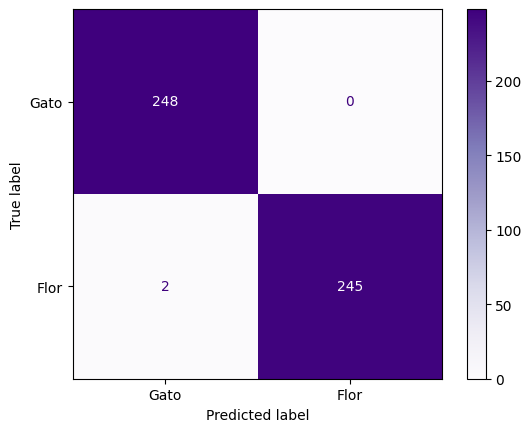

In [230]:
# Mostrar la matriz con GyF
predicciones = modelo.predict(imagenes_test)
clases_predichas = np.argmax(predicciones, axis=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz = confusion_matrix(GyF_test, clases_predichas)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,
                            display_labels=["Gato", "Flor"])  # ajusta si tus GyF están al revés
disp.plot(cmap='Purples')

### Conclusión:
Tenemos en general un buen modelo que ha captado los datos necesarios para la casificacion de manera suficientemente satisfactoria para poder usarla en lo debido. Ahora se pueden hacer criticas contructivas como lo que es la problematica de la capacidad del computador usado, ya que, eso ha impedido hacer simulaciones más complejas así como la utilizacion del promedio como convergencia para el número de épocas cuando pudimos haber usado otras métricas.
Aún con todo esto el modelo ha sido funcional y sirve para el proposito antes dicho ya que se logro obtener resutados buenos con el filtro dado y al final podemos tener nuestro pequeño juego.

#Juego:
#Prueba tu imagen (debes de correr el codigo para hacerlo)

In [226]:
def predecir_imagen(imagen):
    img = imagen.resize((64, 64))
    img = img.convert("RGB")
    img = filtro_patrones(img)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediccion = modelo.predict(img_array)
    clase = np.argmax(prediccion)
    return "Creo que esto es un gato 🐱" if clase == 1 else "Creo que esto es una flor 🌸"

# Interfaz drag and drop
theme_morado = gr.themes.Base(
    primary_hue="purple",
    neutral_hue="purple"
)
gr.Interface(fn=predecir_imagen,
             inputs=gr.Image(type="pil", label="Sube una imagen"),
             outputs="text",
             title="¿A que se parece más a un Gato o una Flor?",
             live=False,
             ).launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().


KeyboardInterrupt: 

### Ejemplo de visualizacion:
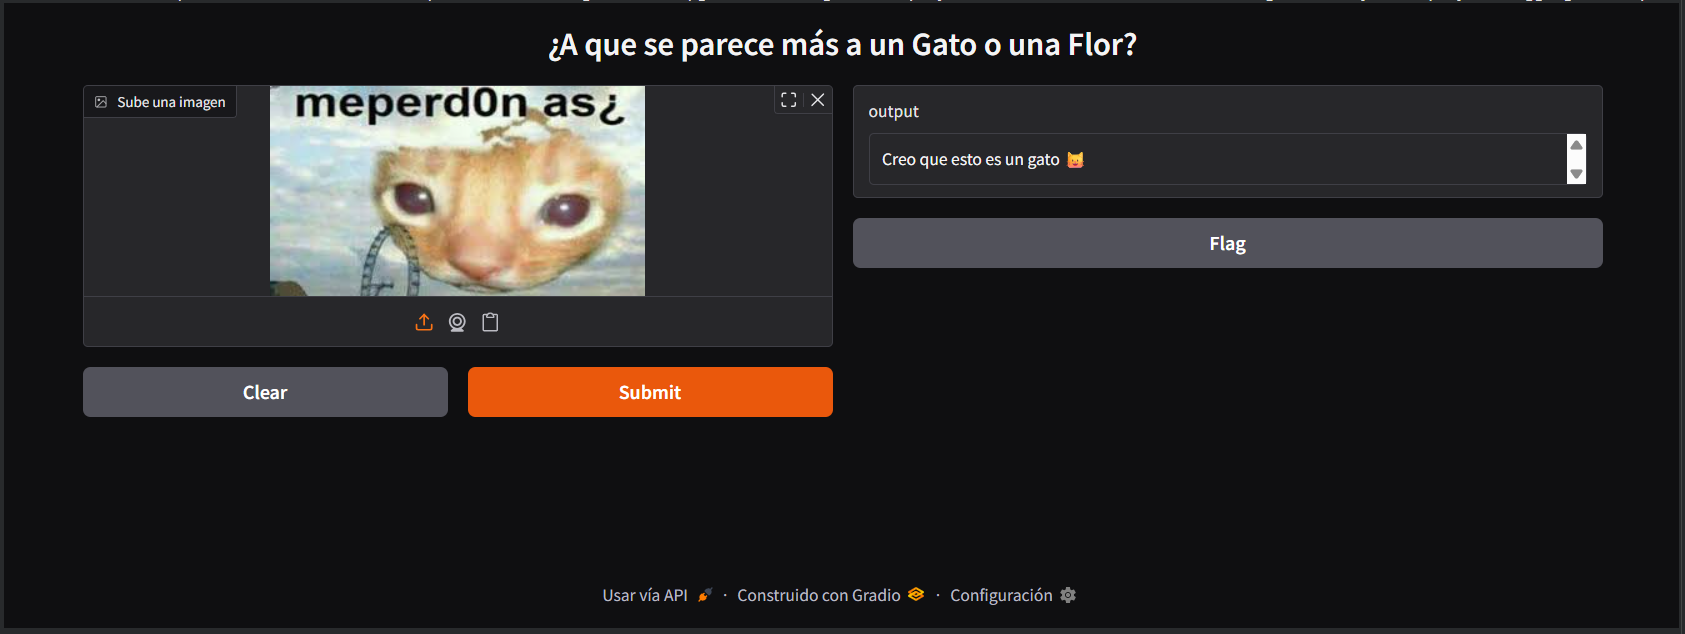
Esta imagen inspiró el juego

In [ ]:
import gradio as gr
import numpy as np

# ------- TEMA MORADO COMPATIBLE ---------

theme_morado = gr.themes.Soft(
    primary_hue=gr.themes.colors.purple,
    secondary_hue=gr.themes.colors.purple,
).set(
    body_background_fill="#f4e8ff",
    body_text_color="#3a224c",
    button_primary_background_fill="#7c3aed",
    button_primary_text_color="white",
)

# -------- CSS PARA CENTRAR OUTPUT ----------

css = """
#output-text {
    text-align: center;
    font-size: 22px;
}
"""

# -------- FUNCIÓN DEL MODELO ---------

def predecir_imagen(imagen):
    img = imagen.resize((64, 64))
    img = img.convert("RGB")
    img = filtro_patrones(img)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediccion = modelo.predict(img_array)
    clase = np.argmax(prediccion)
    return "Creo que esto es un gato 🐱" if clase == 1 else "Creo que esto es una flor 🌸"


# -------- INTERFAZ GRADIO ---------

gr.Interface(
    fn=predecir_imagen,
    inputs=gr.Image(type="pil", label="Sube una imagen"),
    outputs=gr.Textbox(label="", elem_id="output-text"),
    title="¿A qué se parece más? ¿Gato o Flor?",
    theme=theme_morado,
    css=css,
    live=False
).launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d531c8a10ea7f5e1a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1133, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


### Citas:
1. *Checking your browser - reCAPTCHA. (s. f.). https://www.kaggle.com/datasets/pavansanagapati/images-dataset*

2. *3.9. Máscara de desenfoque. (s. f.). https://docs.gimp.org/2.6/es/plug-in-unsharp-mask.html*

2. *Wiki, C. T. L. (s. f.). Meperd0n as¿. Loquendo Wiki. https://loquendo.fandom.com/es/wiki/Meperd0n_as%C2%BF*